The class is a fundamental building block in Python. It is the basic building block for not only many popular programs and libraries, but the Python standard library as well. Understanding what classes are, when to use them, and how they can be useful is essential, and the goal of this article. In the process, we'll explore what the term **Object-Oriented Programming** means and how it ties together with Python classes.

## Everything Is An Object

What is the **class keyword** used for, exactly? Like its function-based cousin def, it concerns the definition of things. While def is used to define a function, **class** is used to define a class. And what is a class? Simply **a logical grouping of data and functions** (the latter of which are frequently referred to as "methods" when defined within a class).

What do we mean by "logical grouping"? Well, a class can contain any data we'd like it to, and can have any functions (methods) attached to it that we please. Rather than just throwing random things together under the name "class", we try to create classes where there is a logical connection between data and methods. Many times, classes are based on objects in the real world (like Customer or Product). Other times, classes are based on concepts in our system, like HTTPRequest

Regardless, classes are a modeling technique; a way of thinking about programs. When you think about and implement your system in this way, you're said to be performing Object-Oriented Programming. "Classes" and "objects" are words that are often used interchangeably, but they're not really the same thing. Understanding what makes them different is the key to understanding what they are and how they work.

## So Everything Has A Class?

Classes can be thought of as **blueprints (i.e. a sort of instruction manual) for creating objects**. When I define a Customer class using the class keyword, I haven't actually created a customer. Instead, what I've created is a sort of instruction manual for constructing "customer" objects. Let's look at the following example code:

In [2]:
class Customer(object):
    def __init__(self, name, balance=0.0):
        """Return a Customer object whose name is *name* and starting
        balance is *balance*."""
        self.name = name
        self.balance = balance

    def withdraw(self, amount):
        """Return the balance remaining after withdrawing *amount*
        dollars."""
        if amount > self.balance:
            raise RuntimeError('Amount greater than available balance.')
        self.balance -= amount
        return self.balance

    def deposit(self, amount):
        """Return the balance remaining after depositing *amount*
        dollars."""
        self.balance += amount
        return self.balance

The class Customer(object) line does not create a new customer. That is, just because we've defined a Customer doesn't mean we've created one; we've merely outlined the blueprint to create a Customer object. To do so, we call the class's __init__ method with the proper number of arguments (minus self, which we'll get to in a moment).

So, to use the **blueprint** that we created by defining the **class Customer** (which is used to create Customer objects), we call the class name almost as if it were a function: 

In [6]:
jeff = Customer('Jeff Knupp', 1000.0)

The above line simply says "use the Customer blueprint to create me a new object, which I'll refer to as jeff."

The **jeff object**, known as **an instance**, is the realized version of the Customer class. Before we called Customer(), no Customer object existed. We can, of course, create as many Customer objects as we'd like. There is still, however, only one Customer class, regardless of how many instances of the class we create.

## self?

So what's with that self parameter to all of the Customer methods? What is it? Why, it's the instance, of course! Put another way, a method like withdraw() defines the instructions for withdrawing money from some abstract customer's account. Calling

In [7]:
jeff.withdraw(100.0)

900.0

puts those instructions to use on the jeff instance.

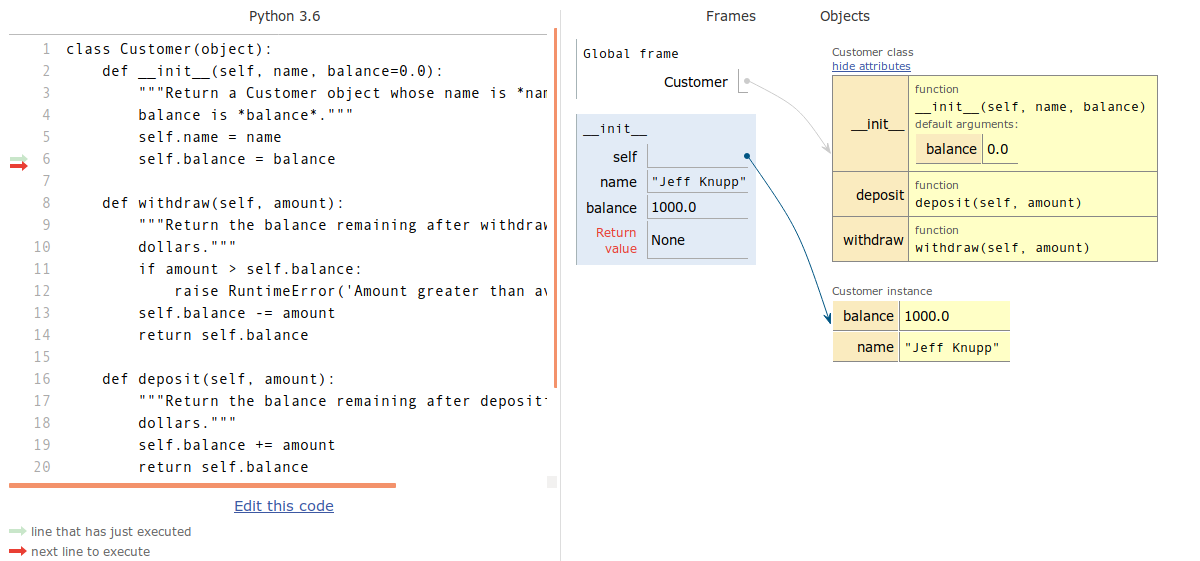

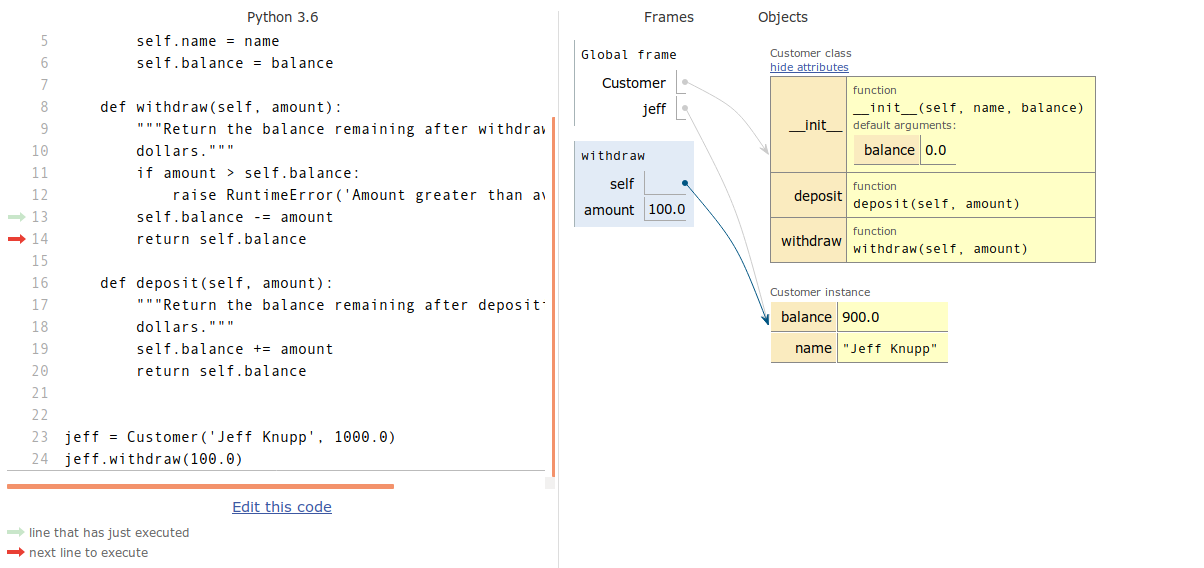

So when we say def withdraw(self, amount):, we're saying, "here's how you withdraw money from a Customer object (which we'll call self) and a dollar figure (which we'll call amount). self is the instance of the Customer that withdraw is being called on. That's not me making analogies, either. 

In [8]:
jeff.withdraw(100.0)

800.0

is just shorthand for

In [9]:
Customer.withdraw(jeff, 100.0) # which is perfectly valid (if not often seen) code.

700.0

##  __init__

When we execute the following line:

In [11]:
class Customer(object):
    def __init__(self, name, balance=0.0):
        """Return a Customer object whose name is *name* and starting
        balance is *balance*."""
        self.name = name
        self.balance = balance
    # .. other functions are not mentioned here

In [10]:
jeff = Customer('Jeff Knupp', 1000.0)

Python does the following:

1. It creates an empty Customer object in heap memory
2. It calls the __init__ function of Customer, where self argument is initialized to the object in (1)
   name is initialized to 'Jeff Knupp' and 'balance' is 1000.0
3. __init__ function sets name and balance attributes accordinly as in line 5 and 6 below
   

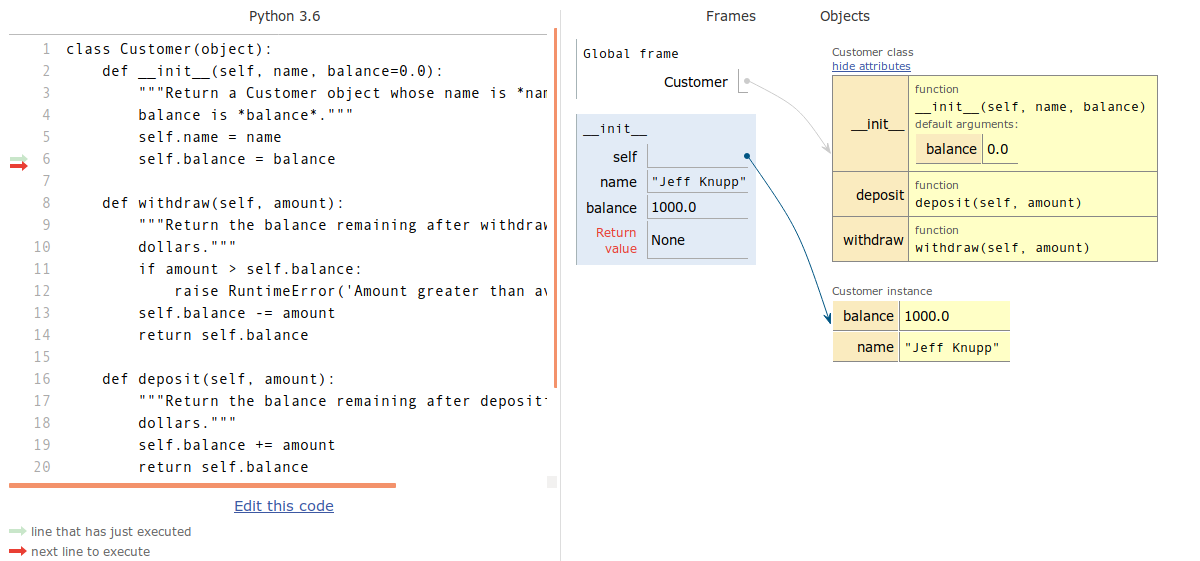

## Be careful what you __init__ or forgot to init

After __init__ has finished, the caller can rightly assume that the object is ready to use. That is, after 

jeff = Customer('Jeff Knupp', 1000.0)

we can start making deposit and withdraw calls on jeff; jeff is a **fully-initialized object**.

Imagine for a moment we had defined the Customer class slightly differently:

In [12]:
class Customer(object):
    def __init__(self, name):
        """Return a Customer object whose name is *name*.""" 
        self.name = name

    def set_balance(self, balance=0.0):
        """Set the customer's starting balance."""
        self.balance = balance

    def withdraw(self, amount):
        """Return the balance remaining after withdrawing *amount*
        dollars."""
        if amount > self.balance:
            raise RuntimeError('Amount greater than available balance.')
        self.balance -= amount
        return self.balance

    def deposit(self, amount):
        """Return the balance remaining after depositing *amount*
        dollars."""
        self.balance += amount
        return self.balance

This may look like a reasonable alternative; we simply need to call **set_balance()** before we begin using the instance. There's no way, however, to communicate this to the caller. Even if we document it extensively, we can't force the caller to call 

jeff.set_balance(1000.0) 

before calling

jeff.withdraw(100.0)

Since the jeff instance doesn't even have a **balance** attribute until **jeff.set_balance()** is called, this means that the object hasn't been "fully" initialized.

**The rule of thumb** is, don't introduce a new attribute outside of the __init__ method, otherwise you've given the caller an object that isn't fully initialized. So, an object should start in a valid state as well, which is why it's important to initialize everything in the __init__ method.

**Invariants** (like, "balance should always be a non-negative number") should hold both when a method is entered and when it is exited. It should be impossible for an object to get into an invalid state just by calling its methods. 

## Instance Attributes and Methods

An function defined in a class is called a "method". Methods have access to all the data contained on the instance of the object; they can access and modify anything previously set on self. Because they use self, they require an instance of the class in order to be used. For this reason, they're often referred to as "instance methods".

## Class Attributes

**Class attributes are attributes that are set at the class-level, as opposed to the instance-level**. Normal attributes are introduced in the __init__ method, but some attributes of a class hold for all instances in all cases. For example, consider the following definition of a Car object:

In [14]:
class Car(object):

    wheels = 4

    def __init__(self, make, model):
        self.make = make
        self.model = model

mustang = Car('Ford', 'Mustang')
print(mustang.wheels)
# 4
print(Car.wheels)

4
4


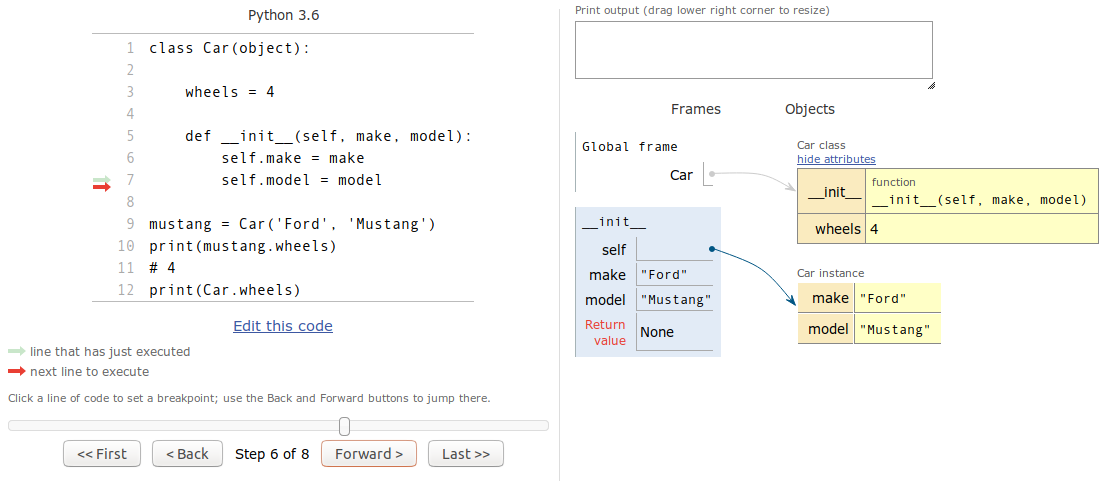

A Car always has four wheels, regardless of the make or model. Instance methods can access class attributes in the same way they access regular attributes: through self (i.e. self.wheels)

## Static methods

There is a class of methods, though, called static methods, that don't have access to self. Just like class attributes, they are methods that work without requiring an instance to be present. Since instances are always referenced through self, **static methods have no self parameter**

## (Static) methods modifying the Class Attributes

Static methods can manipulate the class attributes. Below is Car example extended static methods

In [26]:
class Car(object):
    wheels = 4
    def __init__(self, make, model):
        self.make = make
        self.model = model
        
    @staticmethod
    def set_wheels(wheels): # static/class method having no 'self' argument
        Car.wheels = wheels
                
mustang = Car('Ford', 'Mustang')
carrera = Car('Porshe', 'Carrera')

Car.set_wheels(3)

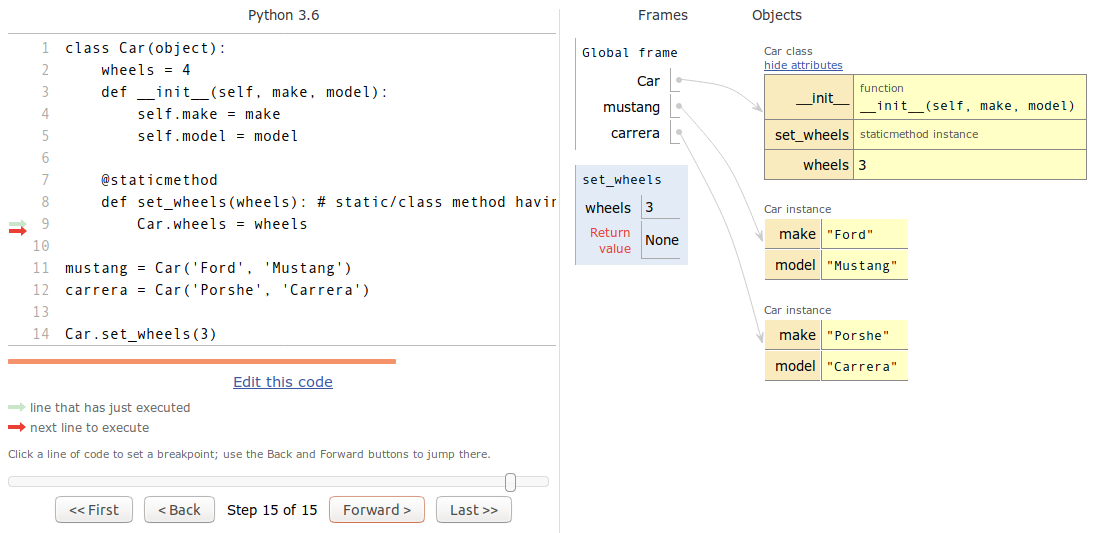

Note that instance methods can also modify the class attributes. Below is an example:

In [28]:
class Car(object):
    wheels = 4
    def __init__(self, make, model):
        self.make = make
        self.model = model
        
    def set_wheels(self, wheels): # instance method modifying Class attribute
        Car.wheels = wheels
                
mustang = Car('Ford', 'Mustang')
carrera = Car('Porshe', 'Carrera')

mustang.set_wheels(3)

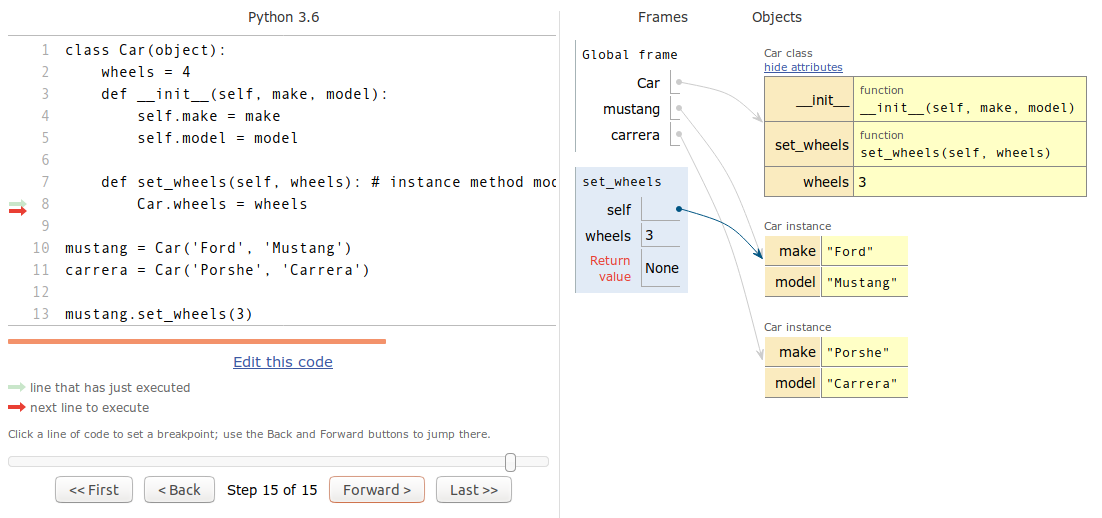

## Inheritance

While Object-oriented Programming is useful as a modeling tool, it truly gains power when the concept of inheritance is introduced. Inherticance is the process by which a "child" class derives the data and behavior of a "parent" class. An example will definitely help us here.

Imagine we run a car dealership. We sell all types of vehicles, from motorcycles to trucks. We set ourselves apart from the competition by our prices. Specifically, how we determine the price of a vehicle on our lot: $5,000 x number of wheels a vehicle has. We love buying back our vehicles as well. We offer a flat rate - 10 percent of the miles driven on the vehicle. For trucks, that rate is 10000. For cars, 8000.

If we wanted to create a sales system for our dealership using Object-oriented techniques, how would we do so? What would the objects be? We might have a Sale class, a Customer class, an Inventory class, and so forth, but we'd almost certainly have a Car, Truck, and Motorcycle class.

What would these classes look like? Using what we've learned, here's a possible implementation of the Car class:

In [29]:
class Car(object):
    """
    Attributes:
        wheels: An integer representing the number of wheels the car has.
        miles: The integral number of miles driven on the car.
        make: The make of the car as a string.
        model: The model of the car as a string.
        year: The integral year the car was built.
        sold_on: The date the vehicle was sold.
    """

    def __init__(self, wheels, miles, make, model, year, sold_on):
        """Return a new Car object."""
        self.wheels = wheels
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on

    def sale_price(self):
        """Return the sale price for this car as a float amount."""
        if self.sold_on is not None:
            return 0.0  # Already sold
        return 5000.0 * self.wheels

    def purchase_price(self):
        """Return the price for which we would pay to purchase the car."""
        if self.sold_on is None:
            return 0.0  # Not yet sold
        return 8000 - (.10 * self.miles)

Now that we've got the Car class, perhaps we should crate a Truck class? Let's follow the same pattern we did for car:

In [30]:
class Truck(object):
    """
    Attributes:
        wheels: An integer representing the number of wheels the truck has.
        miles: The integral number of miles driven on the truck.
        make: The make of the truck as a string.
        model: The model of the truck as a string.
        year: The integral year the truck was built.
        sold_on: The date the vehicle was sold.
    """

    def __init__(self, wheels, miles, make, model, year, sold_on):
        """Return a new Truck object."""
        self.wheels = wheels
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on

    def sale_price(self):
        """Return the sale price for this truck as a float amount."""
        if self.sold_on is not None:
            return 0.0  # Already sold
        return 5000.0 * self.wheels

    def purchase_price(self):
        """Return the price for which we would pay to purchase the truck."""
        if self.sold_on is None:
            return 0.0  # Not yet sold
        return 10000 - (.10 * self.miles)

Wow. That's almost identical to the car class. One of the most important rules of programming (in general, not just when dealing with objects) is **DRY** or **Don't Repeat Yourself**. We've definitely repeated ourselves here. In fact, the Car and Truck classes differ only by a single character (aside from comments).

Where did we go wrong? Our main problem is that we raced straight to the concrete: Cars and Trucks are real things, tangible objects that make intuitive sense as classes. However, they share so much data and functionality in common that it seems there must be **an abstraction** we can introduce here. Indeed there is: the notion of **Vehicle**

## Abstract Classes

A **Vehicle** is not a real-world object. Rather, it is a concept that some real-world objects (like cars, trucks, and motorcycles) embody. We would like to use the fact that each of these objects can be considered a vehicle to remove repeated code. We can do that by creating **an abstract Vehicle class**:

In [39]:
from abc import ABCMeta, abstractmethod

class Vehicle(object):
    """ Attributes:
        wheels: An integer representing the number of wheels the vehicle has.
        miles: The integral number of miles driven on the vehicle.
        make: The make of the vehicle as a string.
        model: The model of the vehicle as a string.
        year: The integral year the vehicle was built.
        sold_on: The date the vehicle was sold.
    """

    __metaclass__ = ABCMeta

    base_sale_price = 0
    wheels = 0

    def __init__(self, miles, make, model, year, sold_on):
        self.miles = miles
        self.make = make
        self.model = model
        self.year = year
        self.sold_on = sold_on
        
    def sale_price(self):
        """Return the sale price for this vehicle as a float amount."""
        if self.sold_on is not None:
            return 0.0  # Already sold
        return 5000.0 * self.wheels

    def purchase_price(self):
        """Return the price for which we would pay to purchase the vehicle."""
        if self.sold_on is None:
            return 0.0  # Not yet sold
        return self.base_sale_price - (.10 * self.miles)

    @abstractmethod
    def vehicle_type():
        """"Return a string representing the type of vehicle this is."""
        pass

Vehicle class is **Abstract Base Class (ABC)**. Setting a class's metaclass to ABCMeta and making one of its methods virtual makes it an ABC. 

Now the Car and Truck classes become:

In [40]:
class Car(Vehicle):
    """A car for sale by Jeffco Car Dealership."""

    base_sale_price = 8000
    wheels = 4

    def vehicle_type(self):
        """"Return a string representing the type of vehicle this is."""
        return 'car'

class Truck(Vehicle):
    """A truck for sale by Jeffco Car Dealership."""

    base_sale_price = 10000
    wheels = 4

    def vehicle_type(self):
        """"Return a string representing the type of vehicle this is."""
        return 'truck'

Now we can instantiate instances of Car and Truck and then call methods on them:

In [41]:
car = Car(10000, 'Toyota', 'Corolla', 2015, None)
truck = Truck(50000, 'BMC', 'Levent', 2016, None)

Lets have a look at how **base_sale_price** and **wheels** class attributes get initialized:

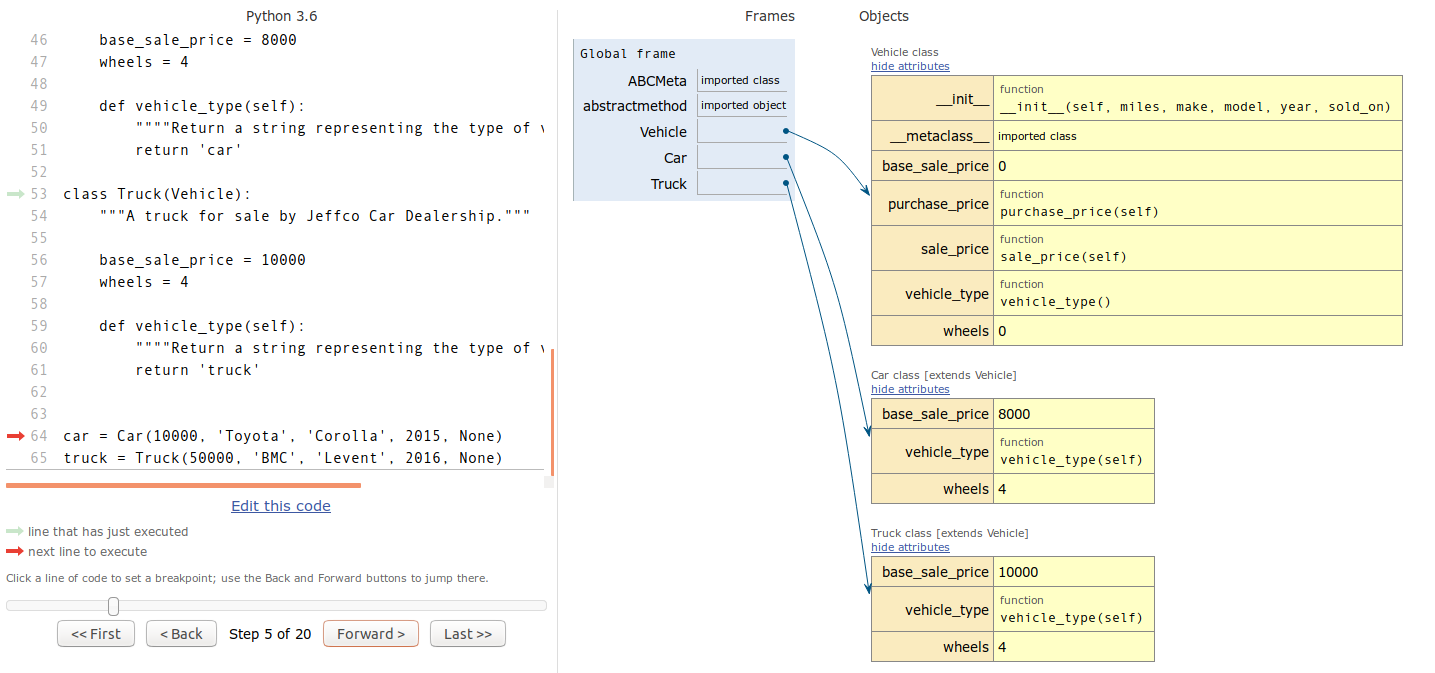

Let's have a look at how instances get initialized

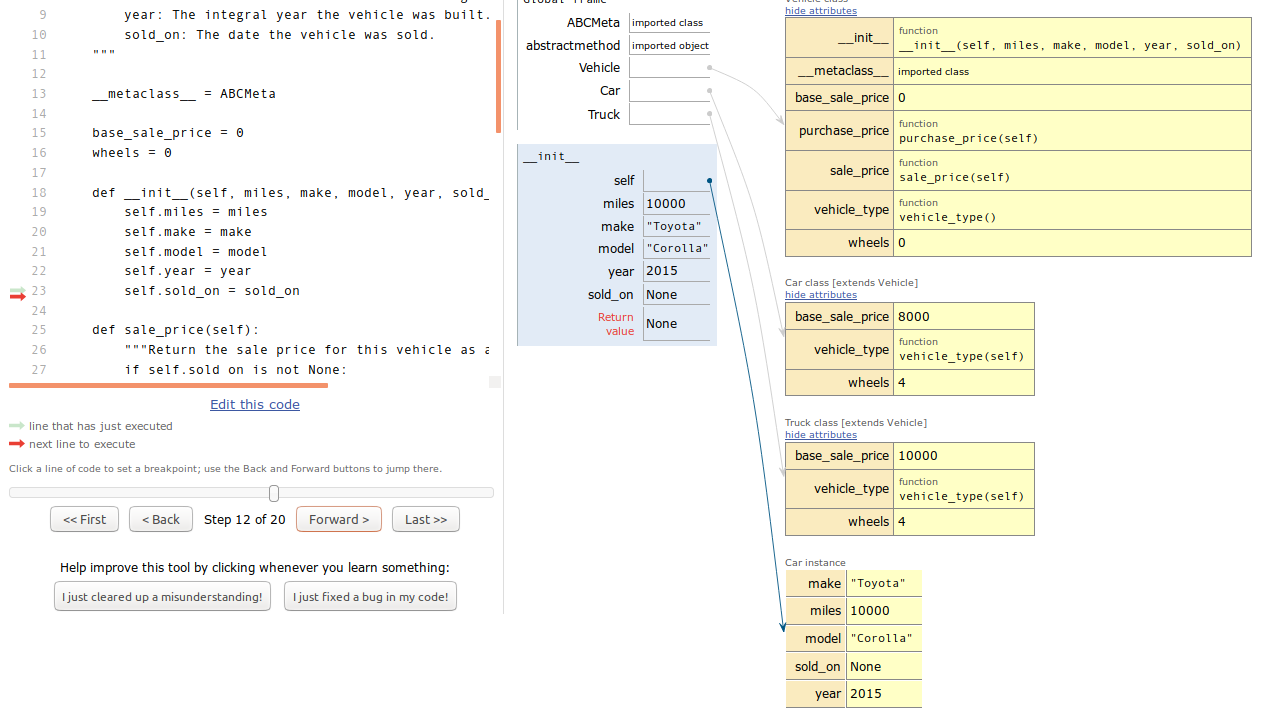

Let's use polymorphism to call the abstract method **vehicle_type**:

In [42]:
def print_vehicle_type(vehicle):
    print(vehicle.vehicle_type())

In [43]:
print_vehicle_type(car)
print_vehicle_type(truck)

car
truck


Lets see how **print_vehicle_type** function works with polymorphism

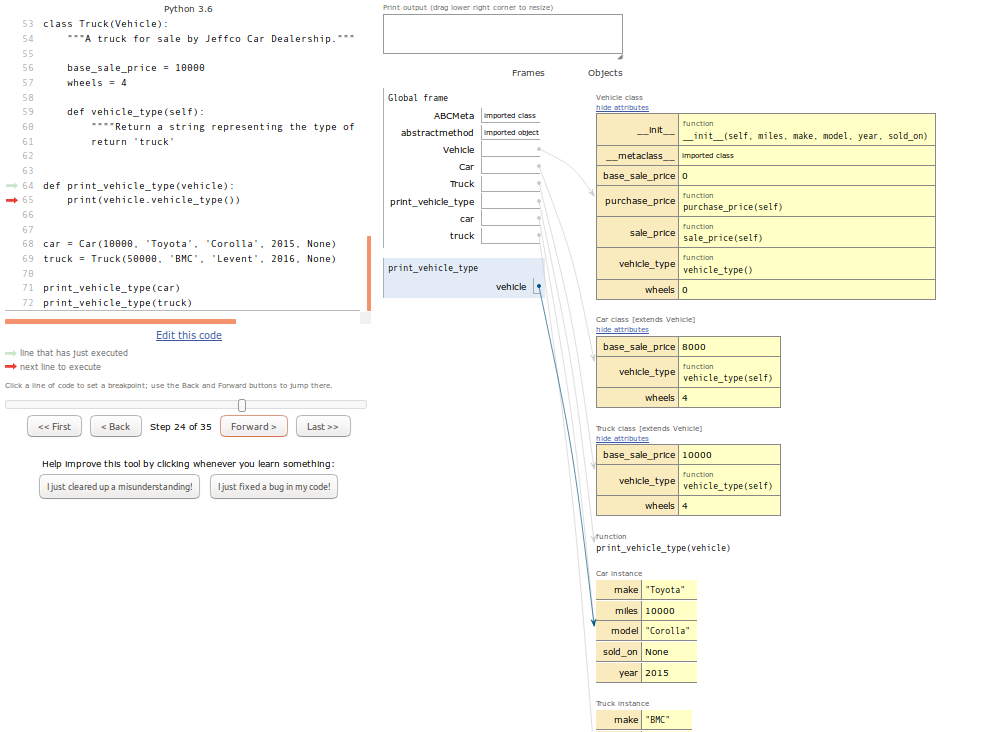

and when the execution gets into the vehicle.vehicle_type()

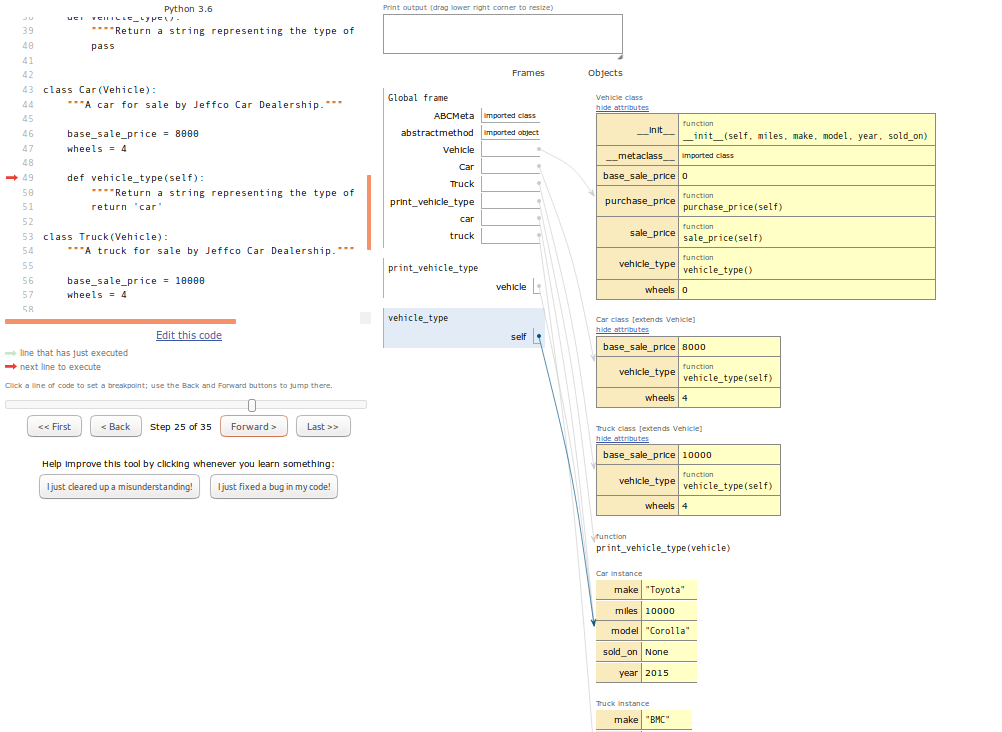

## REFERENCES

[1] https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/